# Insper - Computação para Ciência dos Dados

## Mini-teste - Readmissões em Hospitais Medicare

Em outubro de 2012, o Centro de Serviços Medicare e Medicaid (CMS) do governo dos EUA começou a reduzir os pagamentos do Medicare para hospitais do Sistema de Pagamento Prospectivo de Pacientes Internados com readmissões em excesso. 

O excesso de readmissões é medido por uma razão, dividindo-se o número de readmissões “previstas” de 30 dias de um hospital para ataque cardíaco, insuficiência cardíaca e pneumonia, pelo número que seria “esperado”, com base em um hospital com características similares. Uma proporção maior que 1 indica readmissões em excesso.

* [Dicionário de Dados](https://data.cms.gov/provider-data/sites/default/files/data_dictionaries/hospital/HospitalCompare-DataDictionary.pdf)
* [Pandas Chart Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

### Questões

1. Crie uma coluna `True Admission Rate`, dividindo a coluna `Number of Readmissions` pela `Number of Discharges`
2. Plote um boxplot da diferença entre `True Admission Rate` e `Expected Readmission Rate`. Disserte.
3. Plote um scatterplot das colunas `Predicted Readmission Rate` e `Expected Readmission Rate`, com as cores dos pontos definidas pela coluna `Measure Name`. Disserte.
4. Plote um scatterplot de `Excess Readmission Ratio` por `Number of Discharges`. Disserte.
5. Encontre os 5 estados com maior `Excess Readmission Ratio` e os 5 estados com menor `Excess Readmission Ratio`. Filtre o dataframe com estes 10 estados. Plote um gráfico com um boxplot por estado, considerando a coluna `Excess Readmission Ratio`

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

#df = pd.read_csv('https://raw.githubusercontent.com/amkaris/EDA/master/cms_hospital_readmissions.csv')
df = pd.read_csv('FY_2024_Hospital_Readmissions_Reduction_Program_Hospital.csv')

In [48]:
df.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.8916,3.5325,3.9618,Too Few to Report,07/01/2019,06/30/2022
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,616.0,NaN,1.1003,23.1263,21.0184,149,07/01/2019,06/30/2022
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,274.0,NaN,0.9332,12.9044,13.8283,32,07/01/2019,06/30/2022
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,404.0,NaN,0.9871,17.0529,17.2762,68,07/01/2019,06/30/2022
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,126.0,NaN,0.9517,9.8131,10.3112,11,07/01/2019,06/30/2022


## Respostas

### 1. Crie uma coluna `True Admission Rate`, dividindo a coluna `Number of Readmissions` pela `Number of Discharges`

In [49]:
df.dtypes

Facility Name                  object
Facility ID                     int64
State                          object
Measure Name                   object
Number of Discharges          float64
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions         object
Start Date                     object
End Date                       object
dtype: object

In [50]:
# Converter as colunas para numérico (se necessário)
df['Number of Readmissions'] = pd.to_numeric(df['Number of Readmissions'], errors='coerce')
df['Number of Discharges'] = pd.to_numeric(df['Number of Discharges'], errors='coerce')

# Criar a nova coluna com a divisão
df['True Admission Rate'] = df['Number of Readmissions'] / df['Number of Discharges']
df

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,True Admission Rate
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.8916,3.5325,3.9618,NaN,07/01/2019,06/30/2022,NaN
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,616.0,NaN,1.1003,23.1263,21.0184,149.0,07/01/2019,06/30/2022,0.241883
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,274.0,NaN,0.9332,12.9044,13.8283,32.0,07/01/2019,06/30/2022,0.116788
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,404.0,NaN,0.9871,17.0529,17.2762,68.0,07/01/2019,06/30/2022,0.168317
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,126.0,NaN,0.9517,9.8131,10.3112,11.0,07/01/2019,06/30/2022,0.087302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18769,TRINITY REGIONAL HOSPITAL SACHSE,670319,TX,READM-30-HIP-KNEE-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2019,06/30/2022,NaN
18770,TRINITY REGIONAL HOSPITAL SACHSE,670319,TX,READM-30-HF-HRRP,NaN,1.0,NaN,NaN,NaN,NaN,07/01/2019,06/30/2022,NaN
18771,TRINITY REGIONAL HOSPITAL SACHSE,670319,TX,READM-30-COPD-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2019,06/30/2022,NaN
18772,TRINITY REGIONAL HOSPITAL SACHSE,670319,TX,READM-30-CABG-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2019,06/30/2022,NaN


### 2. Plote um boxplot da diferença entre `True Admission Rate` e `Expected Readmission Rate`. Disserte.

In [51]:
df['Difference'] = df['True Admission Rate'] - df['Expected Readmission Rate']


<Axes: >

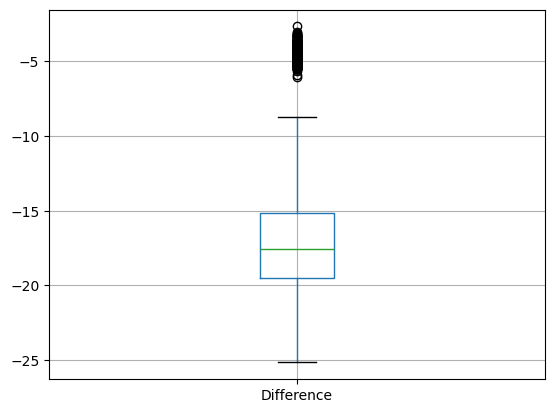

In [55]:
df.boxplot(column='Difference')

#### Dissertação: 
##### Podemos notar por meio do gráfico as seguintes métricas da diferença entre `True Admission Rate` e `Expected Readmission Rate`:
1. Mediana(linha verde):Aproximadamente 17.5

2. A caixa do boxplot mostra a distribuição interquartil, assim sendo podemos dizer que a maior parte dos dados dessa diferença se concentra nessa faixa (entre -20 e -15)

3. Os pontos acima do limite superior representam outliers e como podemos notar no boxplot há um número significativo, assim indicando que em muitos hospitais temos `True Admission Rate` próxima ou até mesmo maior que `Expected Readmission Rate`

4. Assimetria, o formato do boxplot (parte inferior mais proxima do limite que a parte superior) sugere que há uma cauda de valores mais negativos (mais negativos uma vez que a maioria é negativo)

Em suma pode-se dizer que pela maioria dos valores serem negativos, o valor de `Expected Readmission Rate` é em sua maioria maior que `True Admission Rate`, ou seja, o número esperado de readmissões é maior que o valor real medido.

### 3. Plote um scatterplot das colunas `Predicted Readmission Rate` e `Expected Readmission Rate`, com as cores dos pontos definidas pela coluna `Measure Name`. Disserte.


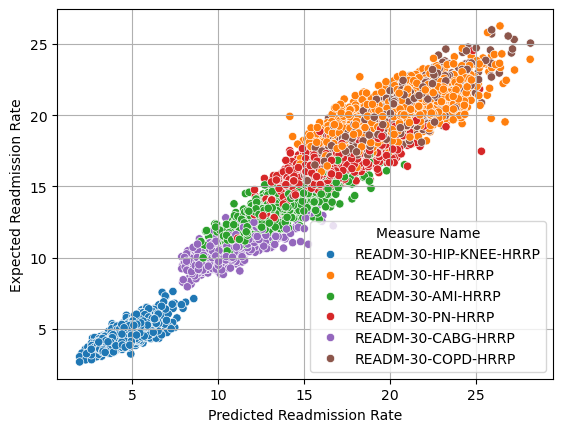

In [59]:
import seaborn as sns
sns.scatterplot(data=df,x='Predicted Readmission Rate', y='Expected Readmission Rate',hue='Measure Name')
plt.grid(True)

#### Dissertação: 
Podemos notar por meio do gráfico uma relação linear entre as variaveis `Predicted Readmission` e `Expected Readmission Rate` não só isso como também é possível notar uma clara relação entre `Measure Name` e o crescimento das variáveis plotadas. Pelo formato do gráfico podemos inferir que `Measure Name` tem uma relação direta com  `Predicted Readmission` e `Expected Readmission Rate` e a depender dessa variavél é possível prever uma região do gráfico para um ponto entre `Predicted Readmission` e `Expected Readmission Rate`. 

Este scatterplot mostra que as previsões de readmissão feitas pelo modelo são consistentes com as taxas de readmissão esperadas, com uma clara separação de padrões por diferentes tipos de procedimentos médicos. As fortes correlações visuais e a formação de clusters indicam que o modelo de previsão está funcionando bem, mas também que diferentes procedimentos possuem diferentes características de readmissão que são bem capturadas pelo modelo.

Rate e